## SUPPORT VECTOR MACHINES (SVM)


#### INTRODUCTION

This notebook showcases the implemention of the Support Vector Machine (SVM) algorithm using the scikit-learn library. This notebook was developed from the scratch to demostrate a significant practical and theoretical understanding of the underlying machine learning algorithm. 

#### LOG OF CHANGES

This log embodies all the computations carrried out for this analysis and how they affect result of the analysis. The log is structured to follows the Cross Industry Standard Process for Data Mining (CRISP-DM) model, and the changes were logged under each of the six phases as follows:

**1. Business understanding**

The aim of this analysis is to predict the type of drugs that should recommend a suitable drug prescription based on comprehensive patient medical records and symptoms. 

**2. Data Understanding**

The dataset used for this analysis was gotten from kaggle (https://www.kaggle.com/datasets/prathamtripathi/drug-classification/discussion/188540). The dataset contains patient medical records with features as follows:

a. Age: Patient's age

b. Sex: Patient's gender

c. Blood Pressure Levels (BP): Patient's blood pressure status

d. Cholesterol Levels: Patient's cholestrol level

e. Na to Potassium Ratio: The ratio of the amount pf Sodium to potassium found in the patient's blood. 

**3. Data Preparation**

In the data preprocessing stage, categorical features were enconded using a label encoder, making it suitable to be feed into the algorithm.

**4. Modelling**

The following changes were implemented during the modelling phase:

**a) Encoding the target variable**

**Change:** The target variable (Drug) was encoder into a numeric variable using a label encoder.

**Result:** This preprocessed the data, making it ready to be fit into the algorithm.

**b) Changing the kernel type**

**Change:** The kernel type used when instantiating the model was changed and the performance of the model was examined

**Result:** For the Radial Basis Function (RBF) kernel the accuracy was 62.5%, while the accuracy was 96% and 74% for the linear and polynomial kernels respectively.

**c) Using cross validation**

**Change:** The datset was splited into 5 folds via random sampling.

**Result:** The accuracy of the model was 97%, which seems like a much better result.

**d) Examining different number of folds**

**Change:** A function was created to test different values of K, and examine the accuracy.

**Result:** The accuracy didn't change much when will alter the number of folds. 

**4. Evaluation:**

The performance of the model was evaluated using various metric scores including accuracy, precision, recall and f1-score.


**5. Deployment:**

The best model was saved as a pickle file and was deployed as a web application which which runs locally. The name of the web app is Urinary_app, which will be remotely hosted before the final submission.



#### ANALYSIS

First things first, let's import the neccessary libraries.


#### 

In [49]:
import pickle
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


Next, we will load the data set and take a look at it.

In [50]:
# load the drug analysis dataset
df = pd.read_csv('drug200.csv')

In [51]:
# check the first few rows of the dataframe
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [52]:
# Examine the shape of the dataset
df.shape    

(200, 6)

Now, we will check the distribution of the target variable

In [53]:
df.Drug.value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

The distribution shows that the dataset is imbalanced

In [55]:
# Examine the columns in the dataframe
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

Some of the columns are categorical, we need to convert them to numerical values. We can use the a label encoder to convert the categorical values to numerical values. 

In [56]:
# Select only categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category'])
categorical_columns.head()

,Sex,BP,Cholesterol,Drug
0,F,HIGH,HIGH,DrugY
1,M,LOW,HIGH,drugC
2,M,LOW,HIGH,drugC
3,F,NORMAL,HIGH,drugX
4,F,LOW,HIGH,DrugY


In [57]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Iterate through each column in the DataFrame and apply label encoding
for column in categorical_columns.columns:
    df[column] = label_encoder.fit_transform(df[column])

In [58]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [59]:
# Display the class labels
class_labels = label_encoder.classes_
print(f'Class Labels: {class_labels}')

Class Labels: ['DrugY' 'drugA' 'drugB' 'drugC' 'drugX']


Since Label encoder encodes based on alphabetical order, we can see that DrugY is encoded as 0, drugA as 1, drugB as 2, drugC as 3 and drugX as 4.

Great! Now that we have encoded the categorical columns, we can proceed to train a SVM classifier using the encoded data.

Now, we can split the dataset into a training set and a test set. We will use 80% of the data for training and 20% for testing.

In [60]:
# Split the data into features and target
X = df.drop('Drug', axis=1)
y = df['Drug']


In [61]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Create a SVm classifier instance
svm = SVC(random_state=42)  


In [63]:
# Fit the model
svm.fit(X_train, y_train)

SVC(random_state=42)

In [64]:
# Make predictions on the test set
y_pred = svm.predict(X_test)

In [65]:
# Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {accuracy:.3f}")

The accuracy of the model is 0.625


In [66]:
# calculate the accuracy using confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  6],
       [ 0,  0,  0,  0,  3],
       [ 1,  0,  0,  0,  4],
       [ 1,  0,  0,  0, 10]], dtype=int64)

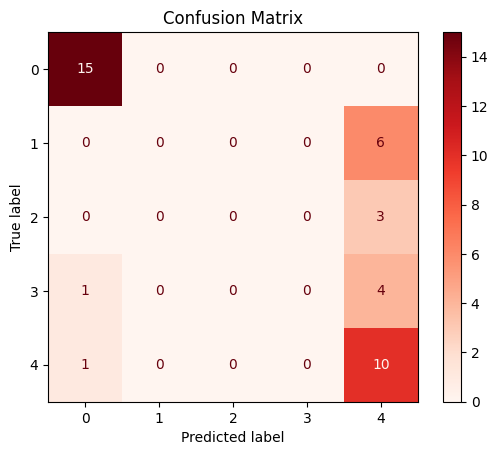

In [67]:
# Display the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Reds', values_format='d', xticks_rotation='horizontal')
plt.title('Confusion Matrix')
plt.show()

In [68]:
# display the classification report
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.00      0.00         6
           2       1.00      0.00      0.00         3
           3       1.00      0.00      0.00         5
           4       0.43      0.91      0.59        11

    accuracy                           0.62        40
   macro avg       0.86      0.38      0.31        40
weighted avg       0.80      0.62      0.51        40



The model has an accuracy of 62%. However, there is possibibility of overfitting, because the imbalance in the target varaible.

#### Using different kernels

The Kernel attribute of the SVM model is set to ‘rbf’ by default. This is the Radial Basis Function (RBF) kernel.  Now, we will use the linear and polynomial kernel to see if the accuracy of the model will improve.

In [127]:
# we will first standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [128]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [129]:
# Create a SVm classifier instance
svm1 = SVC(kernel='linear', random_state=42)


In [130]:
# Fit the model
svm1.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [131]:
# Make predictions on the test set
y_pred = svm1.predict(X_test)

In [132]:
# Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {accuracy:.3f}")

The accuracy of the model is 0.960


In [133]:
# calculate the accuracy using confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[39,  0,  2,  0,  1],
       [ 0, 16,  0,  0,  0],
       [ 1,  0,  7,  0,  0],
       [ 0,  0,  0,  7,  0],
       [ 0,  0,  0,  0, 27]], dtype=int64)

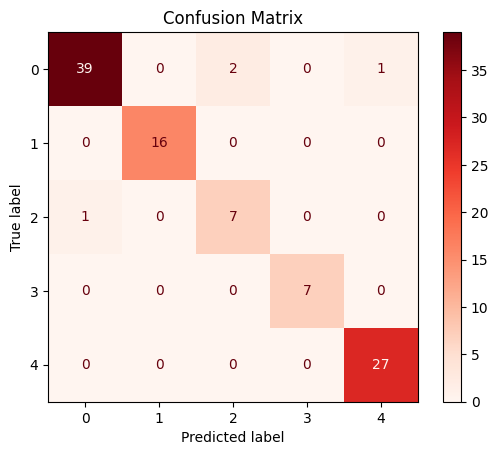

In [134]:
# Display the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Reds', values_format='d', xticks_rotation='horizontal')
plt.title('Confusion Matrix')
plt.show()

In [135]:
# display the classification report
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       1.00      1.00      1.00        16
           2       0.78      0.88      0.82         8
           3       1.00      1.00      1.00         7
           4       0.96      1.00      0.98        27

    accuracy                           0.96       100
   macro avg       0.94      0.96      0.95       100
weighted avg       0.96      0.96      0.96       100



The model has an accuracy of 96% which is a good sign that the model is performing well.

Now we will test the polynomial kernel

In [136]:
# Create a SVm classifier instance
svm2 = SVC(kernel= 'poly')

In [137]:
# Fit the model
svm2.fit(X_train, y_train)

SVC(kernel='poly')

In [138]:
# Make predictions on the test set
y_pred = svm2.predict(X_test)

In [139]:
# Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {accuracy:.3f}")

The accuracy of the model is 0.740


The accuracy of the model when using the polynomial kernel is 74%, which is lower than the accuracy of the linear kernels. 

#### Balancing the target variable

Let is examine the distribution of the target variable visually using a bar chart.


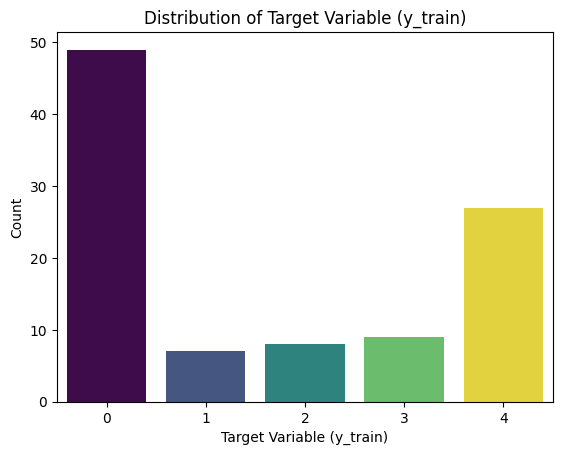

In [140]:
# Visualize the distribution of the target variable using a bar plot using matplotlib and seaborn

df = pd.DataFrame({'Target': y_train})

# Plotting the bar plot using Seaborn
sns.countplot(x='Target', data=df, hue='Target', palette='viridis', legend=False)
plt.xlabel('Target Variable (y_train)')
plt.ylabel('Count')
plt.title('Distribution of Target Variable (y_train)')
plt.show()


The target variable is unbalanced, so we need to balance it using the SMOTE technique.

In [141]:
# We will balance the dataset by using the SMOTE technique
smote = SMOTE(random_state=42)

In [142]:
# Fit the SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [143]:
# check the shape of the resampled and former data
X_train_smote.shape, y_train_smote.shape, X_train.shape, y_train.shape

((245, 5), (245,), (100, 5), (100,))

In [144]:
# Create a DecisionTreeClassifier instance
svm3 = SVC(kernel='linear', random_state=42)

In [145]:
# Now we can train the model using the resampled data
svm3.fit(X_train_smote, y_train_smote)

SVC(kernel='linear', random_state=42)

In [146]:
# Make predictions on the test data
y_pred = svm3.predict(X_test)



In [147]:
# Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.96

The accuracy of the model remains the same after applying SMOTE

#### Using cross validation

Now, we will use cross-validation to evaluate the model's performance. This will be achieved by splitting the dataset into 5 folds and training the model on 4 folds and testing it on the remaining fold. This process will be repeated 5 times, with each fold serving as the test set once. The average accuracy of the model will be calculated.

In [148]:
# instantiate the model
svm2 = SVC(kernel='linear', random_state=42)

In [149]:
# Use cross-validation to evaluate the model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [150]:
# Perform cross-validated scoring
cv_scores  = cross_val_score(svm2, X, y, scoring='accuracy', cv=cv)

In [151]:
# Print the cross-validated accuracy scores
print("Cross-validated Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

Cross-validated Accuracy Scores: [1.    0.925 0.95  0.95  0.95 ]
Mean Accuracy: 0.9550000000000001


This looks like a much better result. The accuracy of the model has improved to 95%.

#### Create a function to perform cross-validation

In [152]:
def cross_val_accuracy(X, y, folds):
    
    svm5 = SVC(kernel='linear')

    # Perform cross-validation and get accuracy scores for each fold
    accuracy_scores = cross_val_score(svm5, X, y, cv=folds)

    # Calculate mean accuracy
    mean_accuracy = np.mean(accuracy_scores)

    return accuracy_scores, mean_accuracy


In [153]:
# trying a range of folds
for i in range(2, 7):
    print(f'For {i} folds:')
    accuracy_scores, mean_accuracy = cross_val_accuracy(X, y, i)
    print(f'Accuracy scores: {accuracy_scores}')
    print(f'Mean accuracy: {mean_accuracy:.4f}')
    print('\n')


For 2 folds:
Accuracy scores: [0.93 0.92]
Mean accuracy: 0.9250


For 3 folds:
Accuracy scores: [0.97014925 1.         0.90909091]
Mean accuracy: 0.9597


For 4 folds:
Accuracy scores: [0.96 0.96 0.96 0.96]
Mean accuracy: 0.9600


For 5 folds:
Accuracy scores: [0.975 0.975 0.95  0.9   1.   ]
Mean accuracy: 0.9600


For 6 folds:
Accuracy scores: [0.97058824 0.97058824 0.93939394 1.         0.87878788 1.        ]
Mean accuracy: 0.9599




The above result shows that the model's accuracy is consistent across different folds. This is a good sign that the model is not overfitting to the training data.

#### Saving the model as a pickle file

In [133]:
# Save the model to a file using pickle
with open('svm2.pkl', 'wb') as file:
    pickle.dump(svm1, file)